In [11]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(""), "..")))


In [12]:
from tmac import (
    Asset,
    DataFlow,
    DataStore,
    Machine,
    Model,
    Process,
    Protocol,
    Score,
    TableFormat,
    Technology,
)  # noqa: E402
from tmac.plus import Browser  # noqa: E402


> Users must log in to the website before they can carry out any of the use cases.

In [13]:
model = Model("Login Model")
user = Browser(model, "User")


In [14]:
web_server = Process(
    model,
    "WebServer",
    machine=Machine.VIRTUAL,
    technology=Technology.WEB_APPLICATION,
)

login = DataFlow(
    model,
    "Login",
    source=user,
    destination=web_server,
    protocol=Protocol.HTTPS,
)

login.transfers(
    "UserCredentials",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)


In [15]:
database = DataStore(
    model,
    "Database",
    machine=Machine.VIRTUAL,
    technology=Technology.DATABASE,
)

authenticate = DataFlow(
    model,
    "Authenticate",
    source=web_server,
    destination=database,
    protocol=Protocol.SQL,
)

user_details = Asset(
    model,
    "UserDetails",
    confidentiality=Score.HIGH,
    integrity=Score.HIGH,
    availability=Score.HIGH,
)

authenticate.transfers(user_details)


In [16]:
print(model.risks_table())


SID                  Severity    Category                    Threat                               Affected    Treatment
-------------------  ----------  --------------------------  -----------------------------------  ----------  -----------
CAPEC-63@WebServer   elevated    Inject Unexpected Items     Cross-Site Scripting (XSS)           WebServer   unchecked
CAPEC-100@WebServer  high        Manipulate Data Structures  Overflow Buffers                     WebServer   unchecked
CAPEC-101@WebServer  elevated    Inject Unexpected Items     Server Side Include (SSI) Injection  WebServer   unchecked
CAPEC-62@WebServer   elevated    Subvert Access Control      Cross Site Request Forgery           WebServer   unchecked
CAPEC-66@WebServer   elevated    Inject Unexpected Items     SQL Injection                        WebServer   unchecked


> Is there a suitable mitigation?

In [17]:
print(model.get_threat_by_id("CAPEC-63"))


CAPEC-63: Cross-Site Scripting (XSS)

Description:
An adversary embeds malicious scripts in content that will be served to web browsers. The goal of the attack is for the target software, the client-side browser, to execute the script with the users' privilege level. An attack of this type exploits a programs' vulnerabilities that are brought on by allowing remote hosts to execute code and scripts. Web browsers, for example, have some simple security controls in place, but if a remote attacker is allowed to execute scripts (through injecting them in to user-generated content like bulletin boards) then these controls may be bypassed. Further, these attacks are very difficult for an end user to detect.

Prerequisites:
- Target client software must be a client that allows scripting communication from remote hosts, such as a JavaScript-enabled Web Browser.

Mitigations:
- Design: Use browser technologies that do not allow client side scripting.
- Design: Utilize strict type, character, and

> Can we mitigate the risk?

In [18]:
model.mitigate_risk("CAPEC-63@WebServer", name="InputValidation", risk_reduction=80)
model.mitigate_risk("CAPEC-63@WebServer", name="InputSanitizing", risk_reduction=80)


> After many long meetings, we decided to accept a risk :)

In [19]:
model.accept_risk("CAPEC-100@WebServer")

print(model.risks_table())


SID                  Severity    Category                    Threat                               Affected    Treatment
-------------------  ----------  --------------------------  -----------------------------------  ----------  -----------
CAPEC-63@WebServer   elevated    Inject Unexpected Items     Cross-Site Scripting (XSS)           WebServer   mitigated
CAPEC-100@WebServer  high        Manipulate Data Structures  Overflow Buffers                     WebServer   accepted
CAPEC-101@WebServer  elevated    Inject Unexpected Items     Server Side Include (SSI) Injection  WebServer   unchecked
CAPEC-62@WebServer   elevated    Subvert Access Control      Cross Site Request Forgery           WebServer   unchecked
CAPEC-66@WebServer   elevated    Inject Unexpected Items     SQL Injection                        WebServer   unchecked


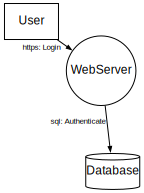

In [20]:
model.data_flow_diagram()
